# CO2 Emissions Analysis 

### Introduction 
To begin with, there are always objectives to research and to identify performance and insights when it comes to an analysis. The objective of this report is to analyse CO2 emissions across several countries from the year 1900 onwards, using descriptive and inferential analytics. 

Moreover, this aligns with the brief requireing the demonstration of data cleaning, visualisation, statistical description and seaborn libraries, usfeul for analysis. Culminating in a t-test comparing mean emissions between the UK and India. 

#### Literature Review
Interestingly, the pandas DataFrame represents a fundamental dta structure with a two-dimensional labelled array. This is evident, when described in the the pandas documentation, as DataFrames combine the flexibility of the spredsheets via NumPy arrays, enhancing indexing, aggregation, and handling missing values. 

Moreover, high-quality analysis starts with reliable data representation and cleaning(Lecture 4, Statistics). Such as df.dropna() and pandas.to_numeric() to ensure there aren't outliers and null values to distort statistical estimates. 

##### Application of DataFrames to climate and CO2 research
Interestingly, the dataset provided include spatial and temporal data. Pandas DataFrames enable the purpose of an analysis to manage somplex data by grouping, pivoting, and aggregating information across dimensions. 

Moreover, Matplotlib's and seaborn's statistical visualisations directly accespt pandas objects, creating a seamless interface between data and representation (Matplotlib docs and seaborn). Therefore ensuring every element or value conveys a quantitative meaning. Also, peaks and trends guide interpretaion and hypothesis formulation (IPCC, 2023). 

To summarise, the pandas DataFrame is situated as both technological and a foundation of modern environmental dta analytics. enabling reproducible cleaning, viz and hypothesis testing of CO2 emission patterns. 







In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

#Using Github to load the dataset

url = 'https://raw.githubusercontent.com/brandi-giuseppe/DataCourse/main/Data/Enviromental/co2_emission.csv'
df = pd.read_csv(url)

df['Entity'] = df['Entity'].str.strip()

# Select countries and filter the years

countries = ['United States', 'China', 'India', 'Germany', 'Italy', 'United Kingdom', 'Spain']
df = df[df['Year']>= 1900]
df = df[df['Entity'].isin(countries)]

df.info()
df
df.describe()
df

#we Know there is 'non-null' on all, however to be sure i need to convert emissions and fill any missing values 
df = df.dropna(subset=['CO2 Emissions']) # drop rows with missing emissions
df['CO2 Emissions'] = pd.to_numeric(df['CO2 Emissions'].round(2))

# some rows may have inalid emissions therefore:

df = df[df['CO2 Emissions'] > 0]
df


#


<class 'pandas.core.frame.DataFrame'>
Int64Index: 824 entries, 4369 to 19927
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Entity         824 non-null    object 
 1   Code           824 non-null    object 
 2   Year           824 non-null    int64  
 3   CO2 Emissions  824 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 32.2+ KB


,Entity,Code,Year,CO2 Emissions
4369,China,CHN,1902,9.526400e+04
4370,China,CHN,1903,1.963904e+06
4371,China,CHN,1904,2.088480e+06
4372,China,CHN,1905,2.297328e+06
4373,China,CHN,1906,1.711088e+07
...,...,...,...,...
19923,United States,USA,2013,5.519613e+09
19924,United States,USA,2014,5.568759e+09
19925,United States,USA,2015,5.420804e+09
19926,United States,USA,2016,5.310861e+09


In [13]:
pd.set_option('display.float_format', '{:,.2f}'.format) # To change scientific notations into full value
df


,Entity,Code,Year,CO2 Emissions
4369,China,CHN,1902,"95,264.00"
4370,China,CHN,1903,"1,963,904.00"
4371,China,CHN,1904,"2,088,480.00"
4372,China,CHN,1905,"2,297,328.00"
4373,China,CHN,1906,"17,110,880.00"
...,...,...,...,...
19923,United States,USA,2013,"5,519,612,557.00"
19924,United States,USA,2014,"5,568,759,258.00"
19925,United States,USA,2015,"5,420,804,127.00"
19926,United States,USA,2016,"5,310,861,406.00"


<function matplotlib.pyplot.show(close=None, block=None)>

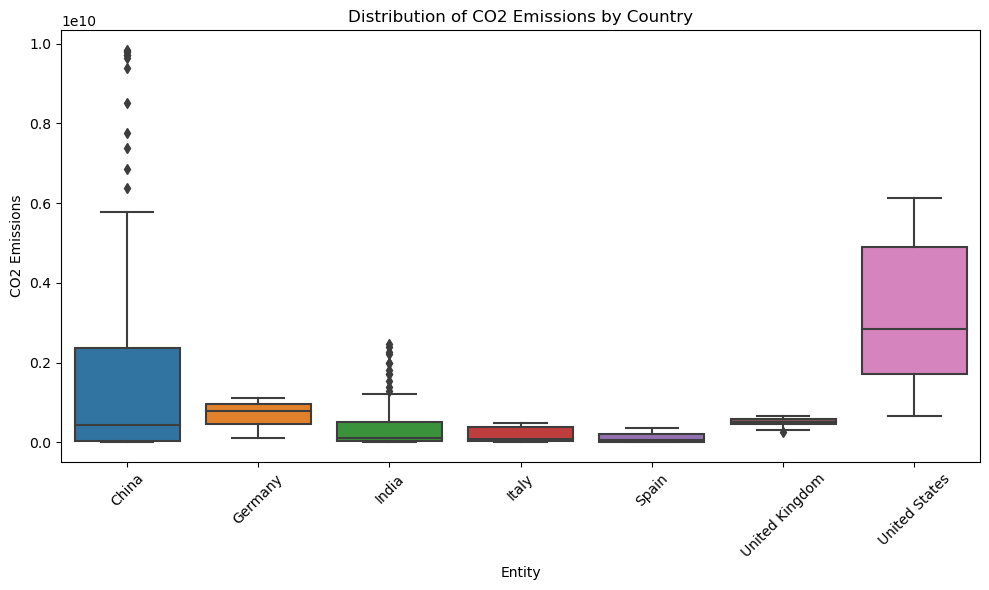

In [22]:
#summary statistics 

summary_stats = df.groupby('Entity')['CO2 Emissions'].agg(['mean', 'median']).reset_index()
summary_stats.columns = ['Country', 'Mean', 'Median']
summary_stats = summary_stats.round(2)
summary_stats

#mean is found in pandas and calculates the arithmatic avg
#median is used to find the middle value in a sorted list
# NaN values are sutomatically ignored






# Variance? 

def calculate_variance_and_std(values):
    #using the variance formula 
    #calculatign the mean 
    #1
    mean = sum(values) / len(values)
    
    #2
    #squared difference 
    squared_diff = []
    for i in values:    # i = value
        difference = i - mean 
        squared = difference ** 2
        squared_diff.append(squared)
        
    #3 
    #Variance 
    variance = sum(squared_diff) / len(values)
    
           
    # Standard Deviation 
#4
    #Standard deviation std
    std_dev = variance ** 0.5 
    
    return round(variance, 2), round(std_dev, 2)




#For each country 
variance_list = []
std_dev_list = []


for country in summary_stats['Country']:
    values = df[df['Entity'] == country]['CO2 Emissions'].tolist()
    
    if len(values) > 0: 
        variance, std_dev = calculate_variance_and_std(values)
        variance_list.append(variance)
        std_dev_list.append(std_dev)
        
    else: 
        variance_list.append(None)
        std_dev_list.append(None)
        
summary_stats['Variance'] = variance_list 
summary_stats['Standard Deviation'] = std_dev_list
summary_stats







plt.figure(figsize=(10,6))
sns.boxplot(x='Entity', y='CO2 Emissions', data=df)
plt.title('Distribution of CO2 Emissions by Country')
plt.ylabel('CO2 Emissions')
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show
    

Evidently, after conducting data cleaning the data, the box-plot provides a compact summary of the statistical distribution of the current findings (values) for seven major countries. Each box represetns the IQR, capturing 50% of values, while tje horizontal line (each box) finds the median. Also, the whiskers extend to identify the range of values, and any points beyond them are considered outliers. 

This visualisation is useful for identifying countries with high values in their emissions data. As seen in the figure, China and USA have high median and an increase in wide spreads, thereofre implying a significant level of emmission. Also, China's broad plot suggests that there has been an increase in thier industrial development and irregular peaks, which could mean that it may have gotten worse overtime. 
Contrastingly, the rest of the countries are more compact, therefore meaning that their CO2 emissions were monitored overtime. 

Regarding my approach to this task, i began by importing the data set using the url from github and inspecting the structure using .info(), .describe(), and .isnull().sum(). Interestingly, I identified mmissing values, inconsistency country names and non-numeric entries. In addition, I decided to drop rows with missing emissions data ensuring a clean and consistent dataset. 

Nonetheless, data cleaning is the foundation of all reliable anaytics. This is because, inaccurate or inconsistent data follows to false statistical results. By validating and purging erros early, there will be a clean DataFrame ensuring trends, visulisations and hypothesis tests reflect true patterns. 



In [ ]:
#df['Emissions %'] = df['CO2 Emissions'] / df['CO2 Emissions'].sum()*100

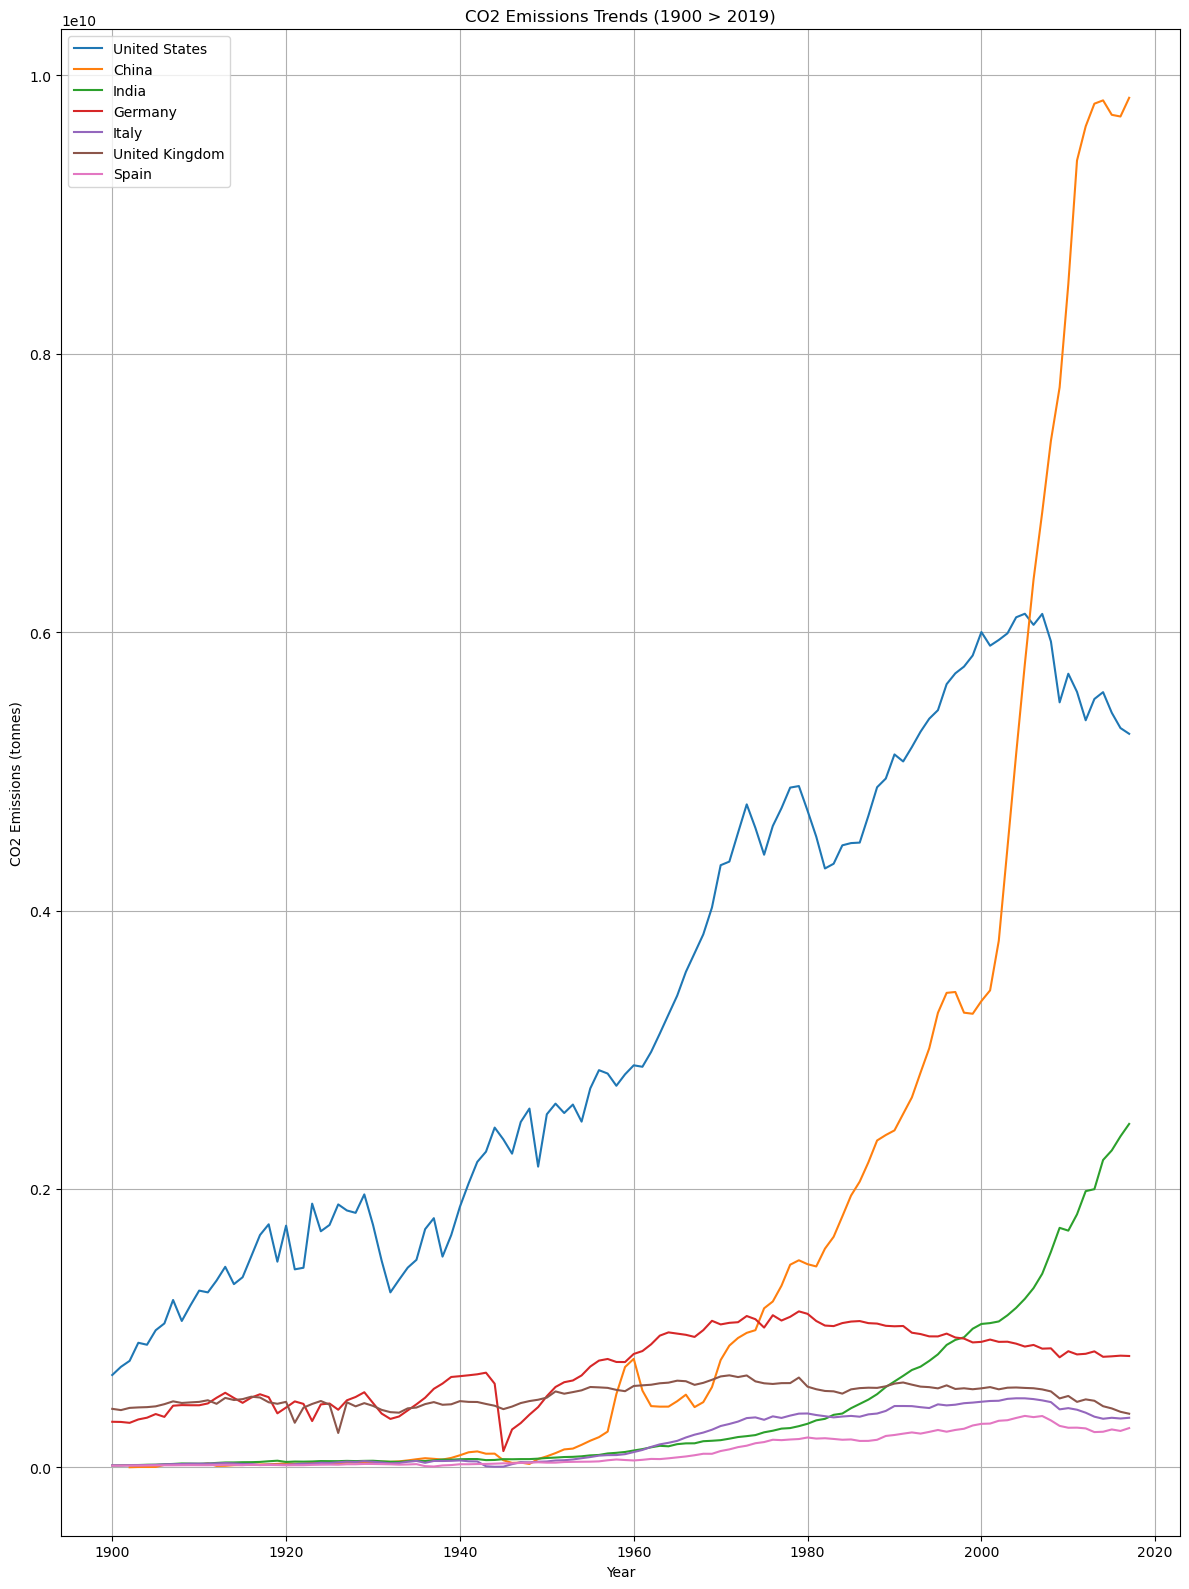

In [23]:
#QUESTION 2###########

plt.figure(figsize = (12, 16))

# Plot emissions over time for each selected country 

for name in countries: 
    #filter for the current country
    
    country_df = df[df['Entity'] == name]
    
    #Plot the emissions trend using year on the x-axis
    plt.plot(
        country_df['Year'],
        country_df['CO2 Emissions'],
        label = name
    )
    
    plt.title('CO2 Emissions Trends (1900 > 2019)')
    plt.xlabel('Year')
    plt.ylabel('CO2 Emissions (tonnes)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show

To begin with, I plotted a time series graph of CO2 emissions for the selected countries in the given timeframe using matplotlib and seaborn to visualise changes overtime.  

This plot is a multi-line graph which trakcs the annual emissions of the selected countries over a lond period of time. As shown above, each country is represented by a distinct color, allowing for clear comparison of temporal trends. 

Evidently, the US presents a steady increase in emissions throughout this timeframe, until 2007 where a grdual decline had approached. Which may be due to policies and industrial restructuring. Whereas China has the trajectory where emissions remained relitavley low until the 2000's, dramatically surging over US emissions. 

Interestingly, India's emissions have a consistent upward trend, particularly after 1990, reflecting its economy and energy. Meanwhile, european countries display either plateauing or declining trends, suggesting an impact on environmental regulations. Also, this plot is central to the trend analysis, offering an explicit visualisation of how emissions evolved across many countries. 

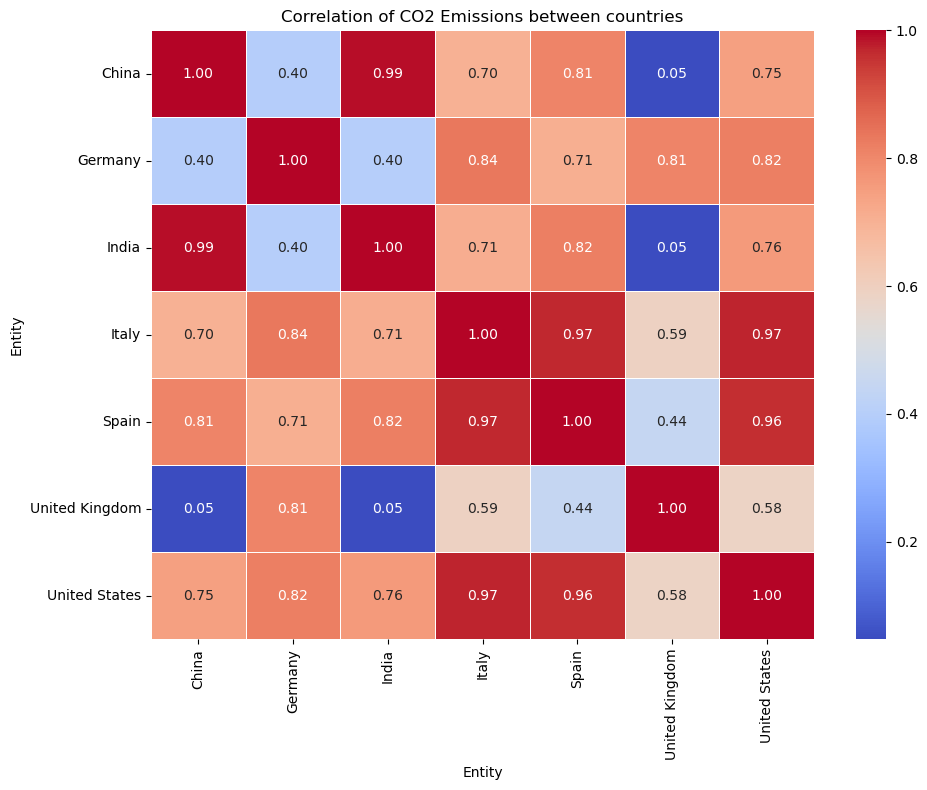

In [33]:
#Question 3 

#Pivot the data so each country becoms a column 
emissions_by_year = df.pivot_table(
    index='Year',
    columns='Entity',
    values='CO2 Emissions'
)


emissions_by_year = emissions_by_year.dropna()

#Pearson correlation 
correlation_matrix = emissions_by_year.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(

    correlation_matrix,
    cmap='coolwarm',
    annot=True, #annotate each numerical value from the data matrix
    fmt= ".2f", #format of the annotated values
    linewidths=0.5

)

plt.title('Correlation of CO2 Emissions between countries')
plt.tight_layout()
plt.show()

This heatmap presents a matrix of Pearsons correlation coefficients, quantifying the process to which emissions trends in countries contribute to CO2 emissions. The color gradient ranges from blue (low correlation) to red (high correlation), with numerical values displayed in each cell. This is given in the following: 
- self-correlation is represented when diagonal values are all 1.00
- China and India of 0.99, possibly due to energy expansion
- Italy and Spain 0.97

In weaker correlations, Germany and China (0.40) and the UK and Spain (0.44), suggest divergent emission trajectories. Nonetheless, this heatmap is relevant to the correlation analysis, providing both quantitative and visual evidence of how emissions patterns align or diverge across countries. Also, supports broader discussions on climate policies as this can determine an influence on reducing the risk of natural disasters.





<function matplotlib.pyplot.show(close=None, block=None)>

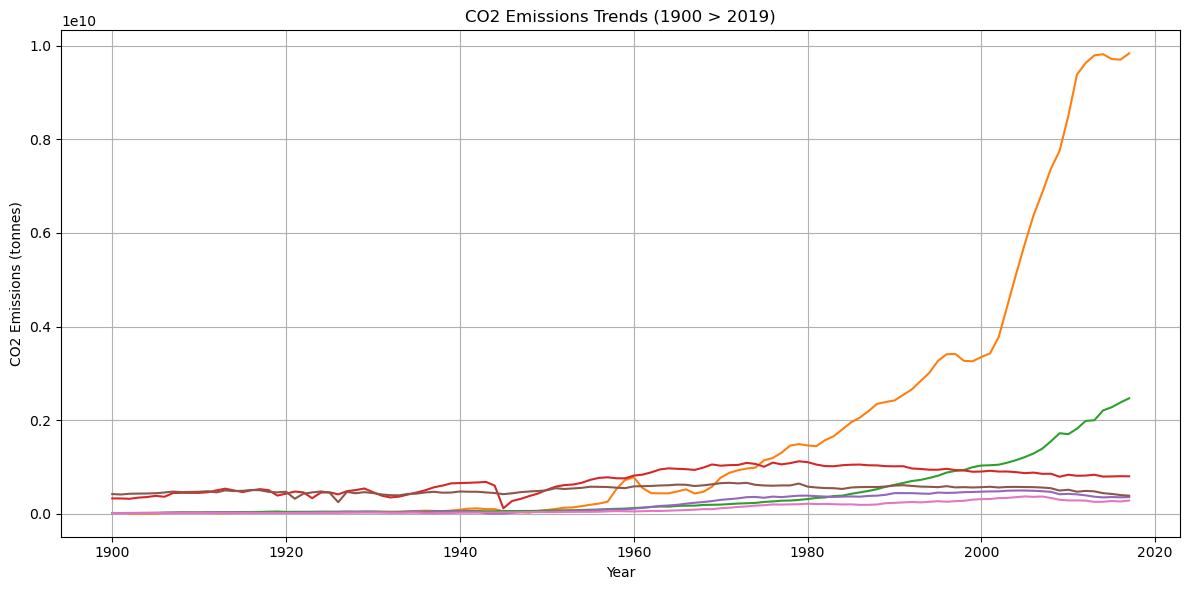

In [30]:
#Question 4

import matplotlib.pyplot as plt 

#filter data for selected countries 

selected_countries = ['Unites States', 'China', 'India', 'Germany', 'Italy', 'United Kingdom','Spain']
df_filtered = df[df['Entity'].isin(selected_countries)]

# create the plot 
plt.figure(figsize = (12, 6))

for country in selected_countries:
    country_data = df_filtered[df_filtered['Entity']== country]
    plt.plot(
        country_data['Year'],
        country_data['CO2 Emissions'],
        label = country
        
    )
    
plt.title('CO2 Emissions Trends (1900 > 2019)')
plt.xlabel('Year')
plt.ylabel('CO2 Emissions (tonnes)')
plt.grid(True)
plt.tight_layout()
plt.show

Interestingly, China reprsents the tallest exponential line beginning around the mid-20th century and accelerating sharply after 2000. Other lines remain relitively flat or show modest increases, therefore highlighting the disproportionate contribution on a single emitter. 

This compliments the previous time series graphs by providing a broader perspective on global emissions and is useful for the performance of induvidual countries. Finally, this plot supports both the trend analysis and the identification of extremes. 

In [34]:
#Question 5 
from scipy.stats import ttest_ind 

uk_emissions = df[df['Entity'] == 'United Kingdom']['CO2 Emissions']
india_emissions = df[df['Entity'] == 'India']['CO2 Emissions']

t_stat, p_value = ttest_ind(uk_emissions, india_emissions, equal_var=False)

print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.5f}")

T-statistic: 1.89
P-value: 0.06180


The scipy function with the parameter equal_var=False, was used to implement this test as it's necessary when it's influenced by welch t-test (lecture 4, statistics) for a two-sample t-test as there's no significance emissions bewtween the teo countries (H0) or there is (H1) which is why there's a two-tailed test.

Nonetheless, since the p-value is greater then 0.05, we fail to reject the null hypothesis. Which indicates that there is no statistically significant difference in the average CO2 emissions between UK and India over the analysed timeframe. This is due to UK declining and India rising, so there isn't a collective increase in CO2 emissions and due to the interest of using methods to validate observed patterns. 

Overall, this analysis is somewhat robust, however was limited by the assumption of normality and equal representation across duration. This is supported where visual trends required statistical validation and the t-test results challanged intuitive conclusions. Nonetheless, what I have understood from this assignment is that data sciecne encourages a transparent analysis to inform climate policy. 

### References 

NU London.week4 - statistics:Descriptive statistics[lecture slides]

NU London.week5 - statistics:Descriptive statistics[lecture slides]

NU London.week3 - statistics:Data visualisation[lecture slides]

pandas.pydata.org. (n.d.). pandas.DataFrame.dropna — pandas 1.0.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html.

‌pandas.pydata.org. (n.d.). pandas.to_numeric — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html.

pandas.pydata.org. (n.d.). pandas.to_numeric — pandas 1.1.4 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html.

‌
Pydata.org. (2024). pandas.DataFrame.median — pandas 2.2.2 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.median.html.

‌
W3schools.com. (2024). W3Schools.com. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_agg.asp.

‌Matplotlib (2024). Matplotlib: Python Plotting — Matplotlib 3.1.1 Documentation. [online] Matplotlib.org. Available at: https://matplotlib.org/.

‌IPCC (2023). AR6 Synthesis Report: Climate Change 2023. [online] www.ipcc.ch. Available at: https://www.ipcc.ch/report/ar6/syr/.

‌DATAtab (2023). t-Test - Full Course - Everything you need to know. [online] www.youtube.com. Available at: https://www.youtube.com/watch?v=VekJxtk4BYM.

‌Keith Galli (KGMIT) (2024). Complete Python Pandas Data Science Tutorial! (2024 Updated Edition). [online] YouTube. Available at: https://www.youtube.com/watch?v=2uvysYbKdjM.

‌Data Science For Everyone (2025). Statistical analysis in Python | Part 01 | Measures of center and spread | Pandas, NumPy & Seaborn. [online] YouTube. Available at: https://www.youtube.com/watch?v=odGQ5t-x5zU [Accessed 24 Oct. 2025].

‌